# Data Exploration & Visualization
### [Data Science Africa Summer School 2016](www.datascienceafrica.org/dsa2016)
#### Notebook Created by [Ernest Mwebaze](www.air.ug/emwebaze)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from generatedatah import *
import seaborn as sns
sns.set(color_codes=True)

# Data Cleaning

We will look at cleaning sample data from hospital records that show records of child birth that were entered onto sheets of paper and transcribed into an electronic system by interns. The data is a bit messy and hard to analyse as it is. 

Note that this is simulated data. We also tie the data to your birthday so please enter your birthday to generate your unique set.

In [2]:
# Generate the data
random_seed =  286
Gender, Weights, Heights, Birthdays, ChildCondition = generate_birth_data(random_seed)

In [3]:
print len(Gender), len(Weights), len(Heights), len(Birthdays), len(ChildCondition)

5148 5148 5148 5148 5148


In [6]:
Gender[:20]

['byo',
 'gril',
 'byo',
 'gir',
 'gril',
 'byo',
 'girl',
 'gril',
 'Girl',
 'gir',
 'girl',
 'gril',
 'byo',
 'Girl',
 'gir',
 'byo',
 'byo',
 'gir',
 'gril',
 'girl']

### Clean Gender data

The attribute Gender has different variations of the words 'girl' and 'boy'. Your role is to write a function that takes in the attribute data Gender and returns cleaned words. The attribute Gender should only have words consisting of ['girl','boy'].

In [4]:
def convert_to_dataframe(Gender, Weights, Heights, Birthdays, ChildCondition):
    # Generate a dataframe from the attributes. 
    # Function should return a dataframe
    # HINT: Look through the documentation on how to create pandas dataframes
    # TODO: WRITE YOUR CODE HERE
    birthDict = {'Gender':Gender, 'Weights':Weights, 'Heights':Heights, 'BirthDays':Birthdays, 'Childcondition':ChildCondition}
    birthData = pd.DataFrame(birthDict)
    return birthData

***Checking out your data***
After loading a dataset it is always good to check it out using techniques from the previous lecture. Common tools are ```describe(), shape, unique()```

For our dataset, run the function to ensure you are loading the data correctly and run the three functions above.
<font color='red'>Questions</font>
1. >How many records are in the dataset ? Answer = 5148
2. >What is the mean weight and mean height ? Answer = 19.13, 48.61
3. >Using unique on each column, which columns need *cleaning* ? Answer = 

In [5]:
# Run your function to create the dataset
birthData = convert_to_dataframe(Gender, Weights, Heights, Birthdays, ChildCondition)
# birthData.head()
birthData.to_csv('birthdatacsv.csv', delimiter=',')
birthData.head()

,BirthDays,Childcondition,Gender,Heights,Weights
0,2002-10-22,"Healthy, Tall",byo,58,0.2
1,2003-11-23,"Weak, Healthy",gril,55,3.8
2,2002-06-21,Tall,byo,56,2.8
3,2003-06-29,Tall,gir,49,2.9
4,2002-10-09,"Weak, Tall, Hairy",gril,49,4.0


In [14]:
# Run shape, describe on the dataset
birthData.shape

(5148, 5)

In [13]:
birthData.describe()

,Heights,Weights
count,5148.000000,5148.000000
mean,48.613636,19.128613
std,6.364251,32.747978
min,38.000000,0.000000
25%,43.000000,1.750000
50%,49.000000,3.000000
75%,54.000000,8.325000
max,59.000000,121.000000


In [20]:
# Run unique on each column and see which columns need fixing
birthData['Childcondition'].unique()

array(['Healthy, Tall', 'Weak, Healthy', 'Tall', 'Weak, Tall, Hairy'], dtype=object)

In [31]:
birthData[:5]

,BirthDays,Childcondition,Gender,Heights,Weights
3,2003-06-29,Tall,gir,49,2.9
4,2002-10-09,"Weak, Tall, Hairy",gril,49,4.0
7,2002-08-18,"Healthy, Tall",gril,41,3.6
8,2003-08-03,"Weak, Healthy",Girl,45,2.4
15,2003-06-13,Tall,byo,48,0.9


In [6]:
# OK lets clean out the Gender column
def remove_invalid_strings(birthData):
    # Remove all rows with empty Gender inputs i.e those with ""
    # Alternatively select all rows of the dataset where the Gender inputs are not ""
    q = birthData['Gender'] != ""
#     q2 = birthData['Heights'] < 50
    birthData = birthData[q]
    return birthData

<font color='red'>Questions</font>
1. >From analysing the new dataset using shape or some other command, how many bad rows were removed ? Answer = 

In [7]:
# Test your cleaned out Gender column
birthData = remove_invalid_strings(birthData)
print birthData.shape
print birthData['Gender'].unique()

(4576, 5)
['byo' 'gril' 'gir' 'girl' 'Girl' 'Gal' 'Boyz' 'boy']


In [ ]:
# The Weights of the kids look weird ! A Kid of 0.5 Kgs ?, Kid of 110 Kgs ? Perhaps we need to clean out this data

# What are the min and max weights in the data ?

In [8]:
# Complete these functions to clean the data
def remove_invalid_lowweights(birthData):
    # Remove rows where weights are below 1.5
    # TODO: WRITE YOUR CODE HERE
    q = birthData['Weights'] >= 1.5
    outbirthData = birthData[q]
    return outbirthData

def remove_invalid_highweights(birthData):
    # Remove rows where weights are above 4.5
    # TODO: WRITE YOUR CODE HERE
    q = birthData['Weights'] <= 4.5
    outbirthdata = birthData[q]
    return outbirthdata

In [9]:
# Test that the functions work
birthData = remove_invalid_lowweights(birthData)
birthData = remove_invalid_highweights(birthData)

# Get max and min weights
birthData.describe()

,Heights,Weights
count,2427.000000,2427.000000
mean,48.553770,2.891965
std,6.358931,0.746659
min,38.000000,1.500000
25%,43.000000,2.300000
50%,48.000000,2.900000
75%,54.000000,3.600000
max,59.000000,4.100000


<font color='red'>Questions</font>
1. >What are the new min and max weights ? Answer = 1.5, 4.1

In [41]:
birthData.Gender.unique()

array(['gril', 'byo', 'gir', 'Girl', 'girl', 'Gal', 'Boyz', 'boy'], dtype=object)

In [45]:
a = [2,3,4,5]
df = pd.Series(a)

def mul_a(x):
    output = x * 2
    return output

In [47]:
b = df.apply(mul_a)
print b

0     4
1     6
2     8
3    10
dtype: int64


In [10]:
def convert_lowercase(x):
    result = x.lower()
    return result

def rename_gender(x):
    result = x
    if x in ['gril','gir','gal']:
        result = 'girl'
    if x in ['byo','boyz']:
        result = 'boy'
    return result

def clean_gender_attribute(birthData):
    # Clean up the gender attribute to remain with gender in ['girl','boy']
    # Plan for execution
    # 1. Convert all the genders to lowercase
    # 2. Look up the 'apply' function for Pandas and see how to use it to replace the dodgy data to correct data
    # TODO: WRITE YOUR CODE HERE
    birthData.Gender = birthData.Gender.apply(convert_lowercase)
    birthData.Gender = birthData.Gender.apply(rename_gender)    
    
    return birthData


In [11]:
# Check that your code works and there are only two genders
birthData = clean_gender_attribute(birthData)
assert len(birthData.Gender.unique()) == 2


### Do basic analysis 
Now we do some basic analysis with our data. So perhaps the hospital wants to find out how many boys were born in a particular month, or year. What the average weights for girls were vs those for boys

In [ ]:
# Just to check - What is the size of the dataset you are using now ?
birthData.shape

In [12]:
# Calculate basic statistics for the hospital
# HINT: It may help to generate different datasets for the different genders
def num_of_girls_boys(birthData):
    # Return number of boys and girls
    # TODO: WRITE YOUR CODE HERE
    return (num_boys, num_girls)

def average_gender_weight(birthData):
    # Return the average weight of the different genders
    # TODO: WRITE YOUR CODE HERE
    return (avg_weight_boys, avg_weight_girls)

def average_gender_height(birthData):
    # Return the average weight of the different genders
    # TODO: WRITE YOUR CODE HERE
    return (avg_height_boys, avg_height_girls)

### Dealing with text in data
Some times you have to deal with text in the dataset. For example we have the condition of the children in this dataset which is textual information.

Pandas provides for doing this kind of analysis with the ```str.contains()``` function that can be applied to a series of a column of a dataframe

In [70]:
# Example
b = ['Juma', 'Jane', 'Tobias']
dexample = pd.Series(b)
print dexample.str.contains('Jane')

0    False
1     True
2    False
dtype: bool


In [53]:
birthData.head()

,BirthDays,Childcondition,Gender,Heights,Weights
1,2003-11-23,"Weak, Healthy",girl,55,3.8
2,2002-06-21,Tall,boy,56,2.8
3,2003-06-29,Tall,girl,49,2.9
4,2002-10-09,"Weak, Tall, Hairy",girl,49,4.0
5,2003-07-03,"Weak, Healthy",boy,59,4.0


In [ ]:
# Do some string manipulations on the data
def num_healthy_kids(birthData):
    # Return the number of healthy kids born 
    # Do this by filtering on the childs condition at birth
    # TODO: WRITE YOUR CODE HERE
    return num_kids

def num_tall_kids(birthData):
    # Return the number of tall kids born 
    # Do this by filtering on the childs condition at birth
    # TODO: WRITE YOUR CODE HERE
    return num_tall_kids

def num_tall_height_kids(birthData):
    # Return number of tall kids who also have a height of over 40 cm
    # TODO: WRITE YOUR CODE HERE
    return num_tall_kids

<font color='red'>Questions</font>
1. >How healthy kids are there at birth ? Answer = 
2. >Whats the number of tall kids at birth ? Answer = 
3. >Whats the number of tall kids with height > 40 cm ? Answer = 

# Visualization
Visualization of data can be for various purposes. Commonly you want to use visualization for exploration of the data and presentation of the data. Here we will look at exploration. 

A key library to use is seaborn, but there are various others. Pandas offers quick ways of visualizing data in dataframes and Series. Underneath it uses matplotlib.

In [57]:
# Lets start by using matplotlib
def plot_scatter(birthData):
    # Plot a scatter plot of Height vs Weight
    X = birthData['Heights']
    Y = birthData['Weights']
    plt.figure()
    plt.scatter(X,Y)
    plt.title('BirthRate: Height vs Weight')
    plt.xlabel('Heights')
    plt.ylabel('Weights')
    return plt

def plot_bar(birthData):
    # Plot bar charts for the gender
    X = birthData['Heights']
    Y = birthData['Weights']
    plt.figure()
    plt.bar(X,Y)
    plt.title('Weight distribution relative to Height')
    plt.xlabel('Height')
    plt.ylabel('Weight')
    return plt

def plot_hist(birthData):
    # plot histogram
    X = birthData['Heights']
    plt.figure()
    plt.hist(X)
    plt.title('Height Distribution')
    plt.xlabel('Height')
    plt.ylabel('Frequency')
    return plt

<module 'matplotlib.pyplot' from '/Users/emwebaze/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

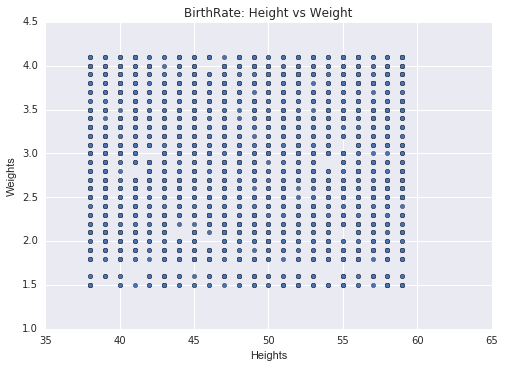

In [63]:
plot_scatter(birthData)

<module 'matplotlib.pyplot' from '/Users/emwebaze/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

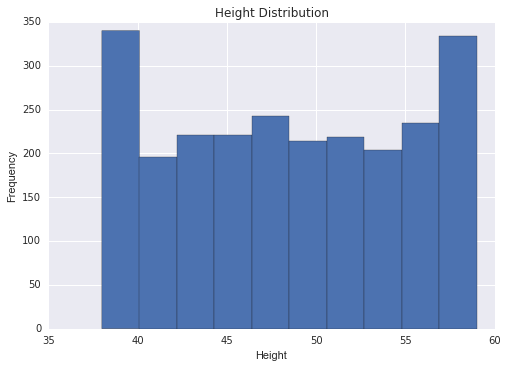

In [64]:
plot_hist(birthData)

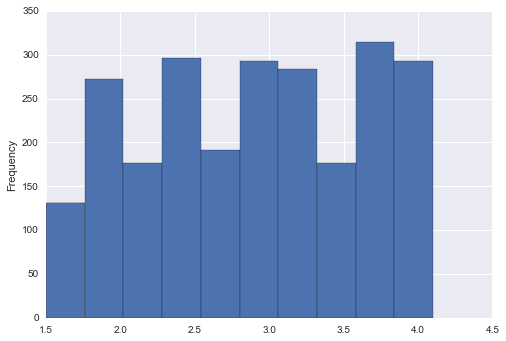

In [17]:
birthData.Weights.plot(kind='hist')

** Using seaborn transforms the plots to much better looking plots :-)**

>Import seaborn and re-run the plots

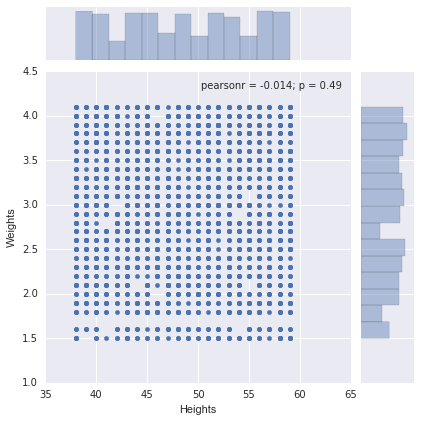

In [66]:
sns.jointplot(x='Heights', y='Weights', data=birthData)

## Plotting time-series data
The index in a Pandas dataframe is a very useful thing to know about. You can convert the indices of a data frame using the index functions.

In [14]:
# Reset the index of the data
birthData = birthData.set_index('BirthDays')
birthData.head()

,Childcondition,Gender,Heights,Weights
BirthDays,,,,
2003-11-23,"Weak, Healthy",girl,55,3.8
2002-06-21,Tall,boy,56,2.8
2003-06-29,Tall,girl,49,2.9
2002-10-09,"Weak, Tall, Hairy",girl,49,4.0
2003-07-03,"Weak, Healthy",boy,59,4.0


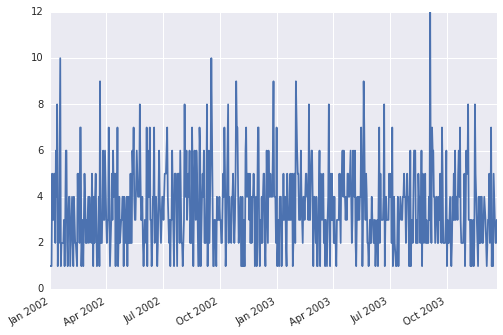

In [68]:
# Plot time series
#Use groupby to get a count of births per month

d = birthData.reset_index()
d.BirthDays.value_counts().plot()

## <font color='red'>Questions</font>
1. >Plot a timeseries of the number of boys born in the two year period
2. >Plot the timeseries of number of girls born in 2003 
3. >Plot a bar plot of the births per month

In [ ]:
# We can now generate data from various time intervals or periods 
# For example quantifying the births by years
# Type birthData.index? to see all the possible options

yd = birthData[birthData.index.year == 2002]
yd.Weight.plot()

## Statistical Rigor, Machine Learning 
Sometimes during analysis we want to determine how significant our inference are in the data. For this we tend to use statistical tests. 

Some questions one may try to answer are for example Is there a difference in the heights of boys and girls born throughout the period ?

In [ ]:
import scipy.stats
# Assume normality
def calculate_statistics(birthData):
    # Assuming normality of the data, use a suitable test to calculate the test statistic using the 
    # two-sample t-test (Welch test)
    # and the p-value associated with the statistic. 
    # TODO: WRITE YOUR CODE HERE
    test_statistic, p_value = scipy.stats.ttest_ind(birthData.Height[birthData.Gender=='girl'], birthData.Marks[birthData.Gender=='boy'], equal_var=False)
    
    return test_statistic, p_value


In [ ]:
test_statistic, pvalue =  calculate_statistics(ageData)
print test_statistic, pvalue

In [ ]:
# Not making the normality assumption for the birth data
def calculate_statistics_nonnormal(ageData):
    # Without assuming normality of the data, use a suitable test to calculate the test statistic
    # and the p-value associated with the statistic. 
    # TODO: WRITE YOUR CODE HERE
    test_statistic, p_value = scipy.stats.mannwhitneyu(birthData.Height[birthData.Gender=='girl'], birthData.Marks[birthData.Gender=='boy'])
    
    return test_statistic, p_value

In [ ]:
test_statistic, pvalue =  calculate_statistics_nonnormal(ageData)
print test_statistic, pvalue